In [21]:
from models import *
from utils import *
import torch
import torchinfo
import torchvision

%reload_ext autoreload
%autoreload 2

In [22]:
# load dataset
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=torchvision.transforms.ToTensor())
val_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, pin_memory=True)
model_name = 'AE_1'


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

model = BasicAutoencoder((1, 28, 28), 32, [256]).to(device)
torchinfo.summary(model, input_size=(1, 1, 28, 28))

opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.MSELoss()

history = train(model, device, train_loader, val_loader, opt, loss_fn, 50, model_name)
history.to_csv(os.path.join('histories', f'{model_name}.history.csv'))


Epoch 1: Train loss: 0.0297, Validation loss: 0.013846577942371369
Epoch 2: Train loss: 0.0118, Validation loss: 0.009880386361479759
Epoch 3: Train loss: 0.0092, Validation loss: 0.008249291055649519
Epoch 4: Train loss: 0.0080, Validation loss: 0.0074736998982727525
Epoch 5: Train loss: 0.0073, Validation loss: 0.006885046043992042
Epoch 6: Train loss: 0.0068, Validation loss: 0.00667763192653656
Epoch 7: Train loss: 0.0064, Validation loss: 0.0062883472688496115
Epoch 8: Train loss: 0.0062, Validation loss: 0.006080538515746594
Epoch 9: Train loss: 0.0060, Validation loss: 0.00588514010310173
Epoch 10: Train loss: 0.0058, Validation loss: 0.005737242901325225
Epoch 11: Train loss: 0.0057, Validation loss: 0.005765017309039831
Epoch 12: Train loss: 0.0056, Validation loss: 0.005644599140435457
Epoch 13: Train loss: 0.0055, Validation loss: 0.00549205242022872
Epoch 14: Train loss: 0.0054, Validation loss: 0.005465274048596621
Epoch 15: Train loss: 0.0053, Validation loss: 0.005398986

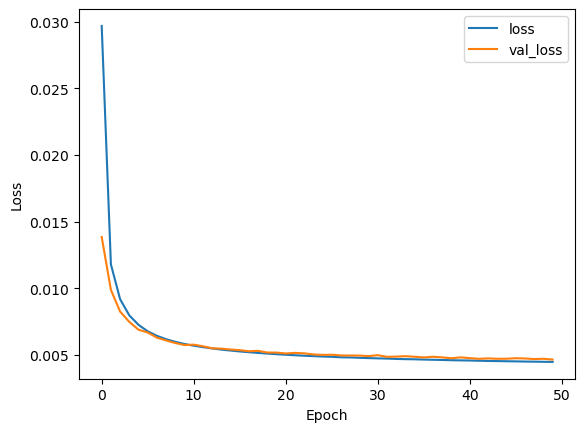

In [24]:
plot_history(model_name)

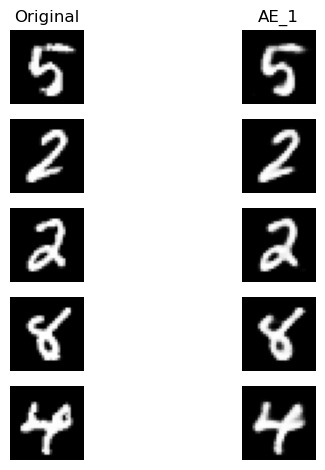

In [32]:
test_batch = next(iter(val_loader))[0][:5]
models = load_models(model_name, kind='best')
show_examples(test_batch, models)